In [63]:
import nltk
import pandas as pd
import numpy as np
import os
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
os.chdir('F:\Board infinity\phonepe')

###  phonepe data analysis


In [65]:
df_phonepe1 = pd.read_csv('phonepe_reviews.csv')
df_phonepe1[df_phonepe1.Source=='Twitter'].index

Int64Index([38420, 38421, 38422, 38423, 38424, 38425, 38426, 38427, 38428,
            38429,
            ...
            40037, 40038, 40039, 40040, 40041, 40042, 40043, 40044, 40045,
            40046],
           dtype='int64', length=1627)

In [66]:
df_phonepe=df_phonepe1.drop(index=df_phonepe1[df_phonepe1.Source=='Twitter'].index)

In [67]:
def processing(text):
    text = re.sub(r'[^ A-Z a-z ]+','',text)
    text = re.sub(r'\s+',' ',text)
    return text

In [68]:
df_phonepe_processed = df_phonepe.copy()
df_phonepe_processed['Reviews'] = df_phonepe['Reviews'].apply(processing)
print(df_phonepe_processed.head())

              Source                                            Reviews
0  Google_Play_store  I would like suggest that for online GOLD buyi...
1  Google_Play_store  App always crashes while exploring the app It ...
2  Google_Play_store  My wallet has been deactivated somehow and tri...
3  Google_Play_store  Its good app but most of the times the transac...
4  Google_Play_store  After entering the debit card details as soon ...


In [69]:
nlp = spacy.load('en_core_web_lg')

### tokenisation, lemmatising, POS tagging


###### Finding most important word

In [70]:
def word_cloud(df): 
    comment_words = '' 
    stopwords = spacy.lang.en.stop_words.STOP_WORDS


    for val in df: 
        
        val = str(val) 
        tokens = val.split() 
      
        # Converts each token into lowercase 
        for i in range(len(tokens)):  
            tokens[i] = tokens[i].lower() 
      
        comment_words += " ".join(tokens)+" "
  
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

    return wordcloud

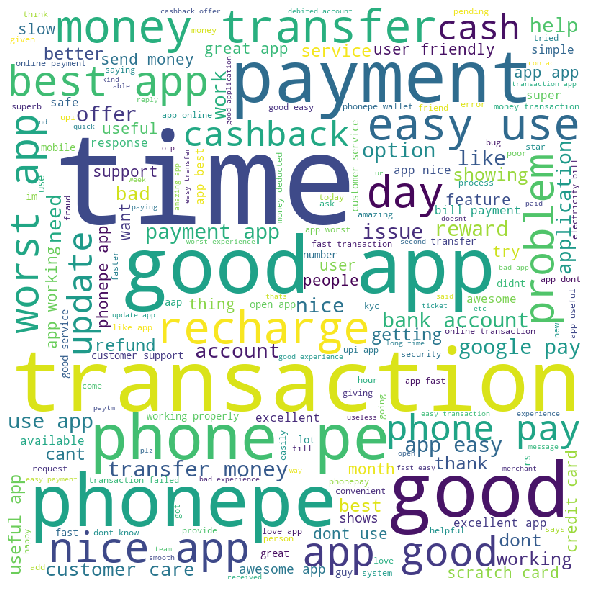

In [71]:
top_words_wordcloud = word_cloud(df_phonepe_processed.Reviews).words_

In [72]:
top_20_words_wordcloud = list(top_words_wordcloud.keys())[:20]
print(top_20_words_wordcloud)

['time', 'transaction', 'good app', 'good', 'phonepe', 'payment', 'phone pe', 'money transfer', 'easy use', 'recharge', 'day', 'nice app', 'best app', 'problem', 'app good', 'worst app', 'phone pay', 'cashback', 'cash', 'update']


### above are top 20 important words from word cloud
### among them 'transaction' and 'time' are highly most imporatant key words


In [73]:
df_transaction = pd.DataFrame()
df_transaction['Reviews'] = df_phonepe_processed['Reviews'].apply(lambda x: x if ('time' in x.lower()) and  ('transaction' in x.lower()) else np.nan)
df_transaction.dropna(inplace=True)


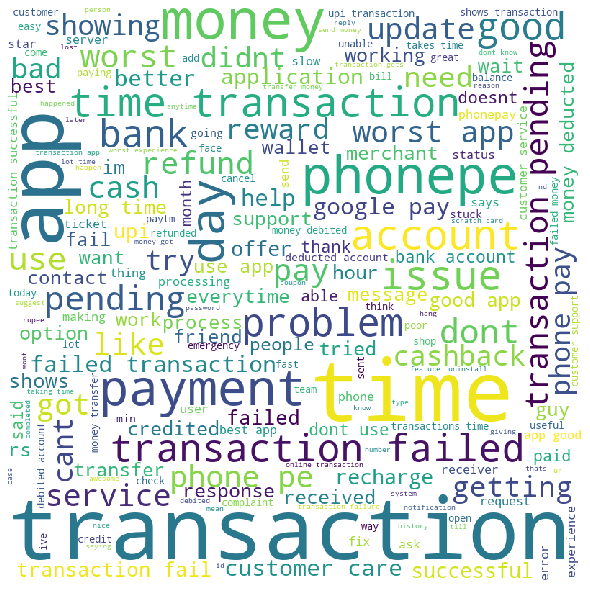

In [74]:
top_words_wc_transaction = word_cloud(df_transaction.Reviews).words_


### POS tagging, tagging and NER analysis

In [75]:
def sub_processing(text):
    text = re.sub(r'[^ A-Z a-z .\',]+','',text)
    text = re.sub(r'[.]+','.',text)
    text = re.sub(r'\s+',' ',text)
    return text


In [76]:
df_phonepe_processed = df_phonepe.copy()
df_phonepe_processed['Reviews'] = df_phonepe['Reviews'].apply(sub_processing)
print(df_phonepe_processed.head())

              Source                                            Reviews
0  Google_Play_store  I would like suggest that for online GOLD buyi...
1  Google_Play_store  App always crashes while exploring the app. It...
2  Google_Play_store  My wallet has been deactivated somehow and tri...
3  Google_Play_store  It's good app but most of the times the transa...
4  Google_Play_store  After entering the debit card details as soon ...


In [77]:
def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)
nouns = []
adjs = []
verbs = []

In [78]:
df_phonepe_processed.Reviews.apply(pos_extractor)

0        None
1        None
2        None
3        None
4        None
         ... 
38415    None
38416    None
38417    None
38418    None
38419    None
Name: Reviews, Length: 38420, dtype: object

In [79]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app            23791
money           7686
transaction     6842
payment         6040
time            4971
               ...  
need             192
page             185
kind             181
developer        179
network          179
Name: nouns, Length: 100, dtype: int64


In [80]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

good             7898
easy             4750
nice             2773
best             2535
worst            2477
                 ... 
extra              65
net                65
indian             64
wrost              64
disappointing      63
Name: adjs, Length: 100, dtype: int64


In [81]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

use         4359
work        2961
pay         2439
get         2211
transfer    1713
            ... 
book         179
allow        177
cashback     175
call         171
hope         167
Name: verbs, Length: 100, dtype: int64


In [82]:
def ner_detection(review):
    if nlp(review).ents !=():
        for  ent in nlp(review).ents:
            ners.append([ent.text,ent.label_])

In [83]:
ners = []
df_phonepe_processed.Reviews.apply(ner_detection)

0        None
1        None
2        None
3        None
4        None
         ... 
38415    None
38416    None
38417    None
38418    None
38419    None
Name: Reviews, Length: 38420, dtype: object

In [84]:
df_ners = pd.DataFrame(ners,columns=['Text','NER_Label'])
df_ners[df_ners.NER_Label=='CARDINAL'].index
df_ners.drop(index=df_ners[df_ners.NER_Label=='CARDINAL'].index,inplace=True)

In [85]:
print(df_ners.NER_Label.unique())

['ORG' 'PERSON' 'PRODUCT' 'DATE' 'NORP' 'GPE' 'ORDINAL' 'TIME' 'EVENT'
 'LAW' 'LOC' 'QUANTITY' 'FAC' 'MONEY' 'WORK_OF_ART' 'LANGUAGE' 'PERCENT']


In [86]:
df_ners.Text[df_ners.NER_Label=='ORG'].value_counts()

UPI                                 578
upi                                 572
Google                              544
aap                                 387
google                              339
                                   ... 
Friendly Application                  1
Nice Convenient Good Application      1
Reveived                              1
DTH Rechage                           1
First upi                             1
Name: Text, Length: 2855, dtype: int64

# sentiment Analysis of phonepe


In [87]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [88]:
df_phonepe_processed['scores'] = df_phonepe_processed.Reviews.apply(analyzer.polarity_scores)
df_phonepe_processed.scores[0]
df_phonepe_processed['compound_score_label'] = df_phonepe_processed.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_phonepe_processed.compound_score_label.value_counts()

pos        24876
neg         9549
neutral     3995
Name: compound_score_label, dtype: int64

In [89]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than phone' in x) or ('best than phone' in x) or ('not better than paytm' in x) or ('waste than patm' in x):
        return 'neg'
    elif ('not better than phone' in x) or ('better than paytm' in x) or ('best than paytm' in x) or ('good than paytm' in x) or ('faster than paytm' in x) or ('better than other' in x):
        return 'pos'
    

df_phonepe_processed['temp'] = df_phonepe_processed['Reviews'].apply(keyword_analyzer)




for index in df_phonepe_processed.index:
    if df_phonepe_processed['temp'][index] != None:
        df_phonepe_processed.compound_score_label[index]=df_phonepe_processed['temp'][index]
        

df_phonepe_processed.drop(columns=['temp'],inplace=True)
df_phonepe_processed.compound_score_label.value_counts()


pos        24512
neg        10030
neutral     3878
Name: compound_score_label, dtype: int64

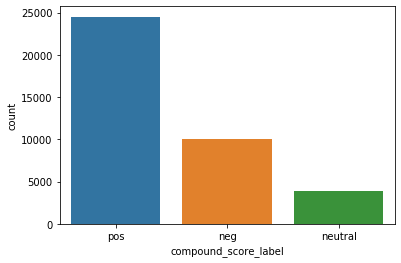

In [90]:
ax = sns.countplot(x='compound_score_label', data=df_phonepe_processed)

# sentiment analysis of phonepe on the basis of payment_experience

In [91]:
df_phonepe_payment_Experience = pd.DataFrame()
df_phonepe_payment_Experience['Reviews'] = df_phonepe_processed['Reviews'].apply(lambda x: x.lower() if ('transaction' in x.lower()) or ('service' in x.lower()) or ('payment' in x.lower()) or ('bank' in x.lower()) or ('payment' in x.lower())
or ('transfer' in x.lower()) or ('refund' in x.lower()) or ('merchant' in x.lower()) or ('credited' in x.lower()) or ('debited' in x.lower()) or ('upi' in x.lower()) or ('otp' in x.lower()) or ('time' in x.lower())else np.nan)
df_phonepe_payment_Experience.dropna(inplace=True)

In [92]:
def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.text)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)

In [94]:
nouns = []
adjs = []
verbs = []

In [118]:
df_phonepe_payment_Experience.Reviews.apply(pos_extractor)

1        None
2        None
3        None
4        None
5        None
         ... 
38415    None
38416    None
38417    None
38418    None
38419    None
Name: Reviews, Length: 20709, dtype: object

In [119]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app            16729
transaction     7538
money           6788
payment         6584
time            5443
               ...  
section          150
processing       150
case             149
status           149
second           145
Name: nouns, Length: 100, dtype: int64


In [120]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

good        5071
easy        2339
best        2269
worst       2129
nice        1541
            ... 
main          55
huge          55
cashback      54
sure          54
total         53
Name: adjs, Length: 100, dtype: int64


In [121]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

use         2593
get         2052
transfer    1826
pay         1656
work        1638
            ... 
reach        131
verify       130
earn         128
account      127
hope         123
Name: verbs, Length: 100, dtype: int64


In [96]:
df_phonepe_payment_Experience['scores'] = df_phonepe_payment_Experience.Reviews.apply(analyzer.polarity_scores)
df_phonepe_payment_Experience.scores[1]
df_phonepe_payment_Experience['compound_score_label'] = df_phonepe_payment_Experience.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_phonepe_payment_Experience.compound_score_label.value_counts()

pos        12871
neg         6005
neutral     1833
Name: compound_score_label, dtype: int64

In [97]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than phone' in x) or ('best than phone' in x) or ('not better than paytm' in x) or ('waste than patm' in x):
        return 'neg'
    elif ('not better than phone' in x) or ('better than paytm' in x) or ('best than paytm' in x) or ('good than paytm' in x) or ('faster than paytm' in x) or ('better than other' in x):
        return 'pos'

In [98]:
df_phonepe_payment_Experience['temp'] = df_phonepe_payment_Experience['Reviews'].apply(keyword_analyzer)

In [99]:
for index in df_phonepe_payment_Experience.index:
    if df_phonepe_payment_Experience['temp'][index] != None:
        df_phonepe_payment_Experience.compound_score_label[index]=df_phonepe_payment_Experience['temp'][index]
        

df_phonepe_payment_Experience.drop(columns=['temp'],inplace=True)
df_phonepe_payment_Experience.compound_score_label.value_counts()

pos        12501
neg         6478
neutral     1730
Name: compound_score_label, dtype: int64

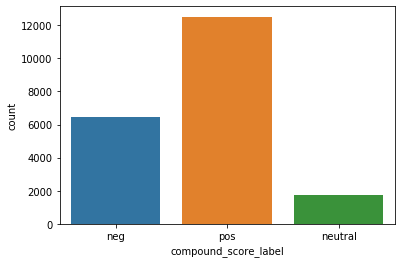

In [60]:
ax = sns.countplot(x='compound_score_label', data=df_phonepe_payment_Experience)

# sentiment analysis of phonepe on the basis of offer


In [100]:
df_phonepe_offer = pd.DataFrame()
df_phonepe_offer['Reviews'] = df_phonepe_processed['Reviews'].apply(lambda x: x.lower() if ('reward' in x.lower()) or ('coupon' in x.lower()) or ('scratch card' in x.lower()) or ('cashback' in x.lower()) or ('offer' in x.lower())
or ('discount' in x.lower()) else np.nan)
df_phonepe_offer.dropna(inplace=True)

In [101]:
def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)

In [102]:
nouns = []
adjs = []
verbs = []

In [103]:
df_phonepe_offer.Reviews.apply(pos_extractor)

20       None
30       None
36       None
48       None
49       None
         ... 
38343    None
38382    None
38389    None
38392    None
38407    None
Name: Reviews, Length: 3661, dtype: object

In [105]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app            2417
cashback       1428
offer          1364
reward         1153
transaction     712
               ... 
food             21
store            20
complaint        20
policy           20
week             20
Name: nouns, Length: 100, dtype: int64


In [106]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

good           835
worst          318
best           275
better         233
nice           231
              ... 
valid            9
unnecessary      9
visible          9
second           9
common           9
Name: adjs, Length: 100, dtype: int64


In [107]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

give        529
get         497
use         452
offer       412
receive     302
           ... 
order        20
complain     20
scratch      19
expire       19
click        19
Name: verbs, Length: 100, dtype: int64


In [112]:
df_phonepe_offer['scores'] = df_phonepe_offer.Reviews.apply(analyzer.polarity_scores)
#df_phonepe_offer.scores[2]
df_phonepe_offer['compound_score_label'] = df_phonepe_offer.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_phonepe_offer.compound_score_label.value_counts()


pos        2010
neg        1371
neutral     280
Name: compound_score_label, dtype: int64

In [113]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than phone' in x) or ('best than phone' in x) or ('not better than paytm' in x) or ('waste than patm' in x):
        return 'neg'
    elif ('not better than phone' in x) or ('better than paytm' in x) or ('best than paytm' in x) or ('good than paytm' in x) or ('faster than paytm' in x) or ('better than other' in x):
        return 'pos'

In [114]:
df_phonepe_offer['temp'] = df_phonepe_offer['Reviews'].apply(keyword_analyzer)

In [115]:
for index in df_phonepe_offer.index:
    if df_phonepe_offer['temp'][index] != None:
        df_phonepe_offer.compound_score_label[index]=df_phonepe_offer['temp'][index]

In [116]:
df_phonepe_offer.drop(columns=['temp'],inplace=True)
df_phonepe_offer.compound_score_label.value_counts()

pos        1945
neg        1438
neutral     278
Name: compound_score_label, dtype: int64

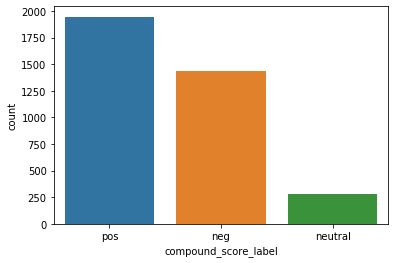

In [117]:
ax = sns.countplot(x='compound_score_label', data=df_phonepe_offer)

# sentiment analysis of phonepe on the basis of AppUI

In [122]:
df_phonepe_AppUI = pd.DataFrame()
df_phonepe_AppUI['Reviews'] = df_phonepe_processed['Reviews'].apply(lambda x: x.lower() if ('feature' in x.lower()) or ('hang' in x.lower()) or ('crashing' in x.lower()) or ('stucking' in x.lower()) or ('ui ' in x.lower())
or ('user interface' in x.lower()) or ('user friendly' in x.lower()) else np.nan)
df_phonepe_AppUI.dropna(inplace=True)

In [125]:
def pos_extractor(review):
    
    for  token in nlp(review):
        if token.is_stop != True and token.is_punct !=True and token.pos_ == 'NOUN':
            nouns.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'VERB':
            verbs.append(token.lemma_)
        elif token.is_stop != True and token.is_punct !=True and token.pos_ == 'ADJ':
            adjs.append(token.text)

nouns = []
adjs = []
verbs = []

In [126]:
df_phonepe_AppUI.Reviews.apply(pos_extractor)

0        None
6        None
7        None
9        None
10       None
         ... 
38277    None
38290    None
38359    None
38382    None
38394    None
Name: Reviews, Length: 2382, dtype: object

In [127]:
df_nouns = pd.DataFrame({'nouns':nouns})
df_nouns = df_nouns.nouns.apply(lambda x: x.lower())
df_nouns = pd.DataFrame(df_nouns)
top_100_nouns = df_nouns.nouns.value_counts()[0:100]
print(top_100_nouns)

app            2149
user            655
phone           565
feature         555
time            395
               ... 
suggestion       18
everytime        18
term             17
feedback         17
performance      17
Name: nouns, Length: 100, dtype: int64


In [128]:
df_adjs = pd.DataFrame({'adjs':adjs})
df_adjs = df_adjs.adjs.apply(lambda x: x.lower())
df_adjs = pd.DataFrame(df_adjs)
top_100_adjs = df_adjs.adjs.value_counts()[0:100]
print(top_100_adjs)

friendly    500
good        434
easy        204
best        164
new         142
           ... 
tired         7
major         7
direct        7
fastest       7
past          7
Name: adjs, Length: 100, dtype: int64


In [129]:
df_verbs = pd.DataFrame({'verbs':verbs})
df_verbs = df_verbs.verbs.apply(lambda x: x.lower())
df_verbs = pd.DataFrame(df_verbs)
top_100_verbs = df_verbs.verbs.value_counts()[0:100]
print(top_100_verbs)

hang       647
work       308
use        278
open       273
change     271
          ... 
deduct      16
access      15
load        15
support     14
reset       14
Name: verbs, Length: 100, dtype: int64


In [130]:
df_phonepe_AppUI['scores'] = df_phonepe_AppUI.Reviews.apply(analyzer.polarity_scores)
df_phonepe_AppUI.scores[0]

{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.9153}

In [131]:
df_phonepe_AppUI['compound_score_label'] = df_phonepe_AppUI.scores.apply(lambda x : 'pos' if x['compound']>0 else 'neg' if x['compound']<0 else 'neutral' )
df_phonepe_AppUI.compound_score_label.value_counts()

pos        1472
neg         610
neutral     300
Name: compound_score_label, dtype: int64

In [133]:
def keyword_analyzer(x):
    if ('worst' in x) or ('pathetic' in x) or ('unable' in x) or ('slower than other' in x) or ('better than phone' in x) or ('best than phone' in x) or ('not better than paytm' in x) or ('waste than patm' in x):
        return 'neg'
    elif ('not better than phone' in x) or ('better than paytm' in x) or ('best than paytm' in x) or ('good than paytm' in x) or ('faster than paytm' in x) or ('better than other' in x):
        return 'pos'

In [134]:
df_phonepe_AppUI['temp'] = df_phonepe_AppUI['Reviews'].apply(keyword_analyzer)

In [135]:
for index in df_phonepe_AppUI.index:
    if df_phonepe_AppUI['temp'][index] != None:
        df_phonepe_AppUI.compound_score_label[index]=df_phonepe_AppUI['temp'][index]

In [136]:
df_phonepe_AppUI.drop(columns=['temp'],inplace=True)
df_phonepe_AppUI.compound_score_label.value_counts()

pos        1426
neg         670
neutral     286
Name: compound_score_label, dtype: int64

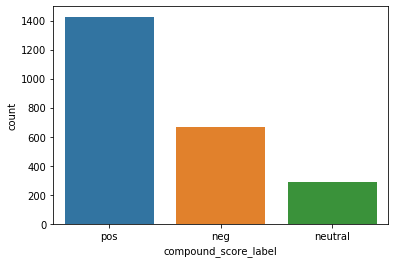

In [137]:
ax = sns.countplot(x='compound_score_label', data=df_phonepe_AppUI)